# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.87285782 2.38668268 2.05134412 2.67256934 2.55476746 2.15556505
 2.59119914 2.63602506 2.13471283 2.51060109]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

(array([ 88., 103., 109., 103.,  91., 106., 101.,  99.,  99., 101.]),
 array([10.01240205, 15.01066098, 20.0089199 , 25.00717883, 30.00543775,
        35.00369668, 40.00195561, 45.00021453, 49.99847346, 54.99673238,
        59.99499131]),
 <a list of 10 Patch objects>)

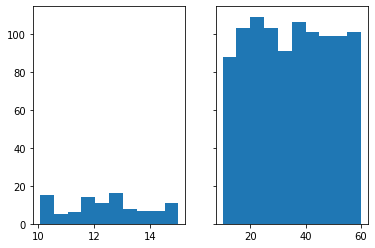

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2,figsize =(6,4), sharey = True)

def random_nbs(bottom, ceiling, count):
    x = uniform.rvs(size=count)
    return bottom + (ceiling-bottom) * x

dist_1 = random_nbs(10,15,100)
dist_2 = random_nbs(10,60,1000)

axs[0].hist(dist_1)
axs[1].hist(dist_2)

How are the two distributions different?

In [14]:
"""First one is generating random numbers between 10 and 15, second one is generating between 10 and 60. 
The difference in scale of occurences is because of the sample size we took is very different - 100 and 1000."""

'First one is generating random numbers between 10 and 15, second one is generating between 10 and 60. \nThe difference in scale of occurences is because of the sample size we took is very different - 100 and 1000.'

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

(array([ 1.,  3.,  0.,  2.,  5.,  6.,  8.,  9.,  8., 11.,  6., 11., 22.,
        25., 23., 33., 29., 34., 38., 50., 43., 54., 53., 51., 62., 39.,
        65., 52., 41., 31., 36., 24., 26., 15., 17., 11., 15.,  9., 12.,
         6.,  3.,  4.,  2.,  0.,  2.,  1.,  1.,  0.,  0.,  1.]),
 array([-141.99972138, -135.49232434, -128.9849273 , -122.47753025,
        -115.97013321, -109.46273616, -102.95533912,  -96.44794208,
         -89.94054503,  -83.43314799,  -76.92575095,  -70.4183539 ,
         -63.91095686,  -57.40355981,  -50.89616277,  -44.38876573,
         -37.88136868,  -31.37397164,  -24.8665746 ,  -18.35917755,
         -11.85178051,   -5.34438346,    1.16301358,    7.67041062,
          14.17780767,   20.68520471,   27.19260175,   33.6999988 ,
          40.20739584,   46.71479289,   53.22218993,   59.72958697,
          66.23698402,   72.74438106,   79.2517781 ,   85.75917515,
          92.26657219,   98.77396924,  105.28136628,  111.78876332,
         118.29616037,  124.80355741

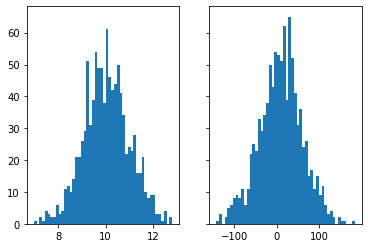

In [20]:
from scipy.stats import norm

fig, axs = plt.subplots(1,2,figsize =(6,4), sharey = True)

def normal_nbs(st_dev, avg, count):
    return norm.rvs(st_dev,avg,count)

dist_1 = normal_nbs(10,1,1000)
dist_2 = normal_nbs(10,50,1000)

axs[0].hist(dist_1, bins = 50)
axs[1].hist(dist_2, bins = 50)


How are the two distributions different?

In [21]:
"""The standard deviation is different, so the second distribution is more "spread out", since stdev is 50x more than 
the first one - horizontal scale is much bigger."""

'The standard deviation is different, so the second distribution is more "spread out", since stdev is 50x more than \nthe first one'

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


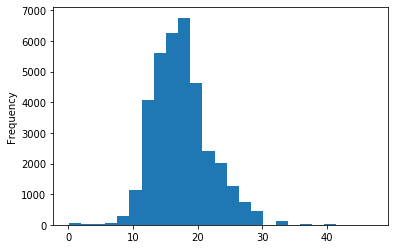

In [35]:
import pandas as pd

veic = pd.read_csv('vehicles.csv')
veic['Fuel Barrels/Year'].plot.hist(bins = 25)
veic

2. CO2 Emission Grams/Mile 

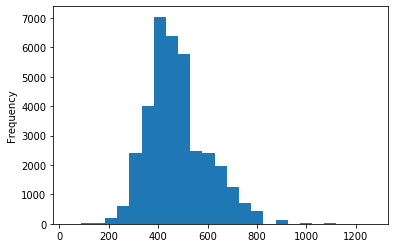

In [36]:
veic['CO2 Emission Grams/Mile'].plot.hist(bins = 25)

3. Combined MPG

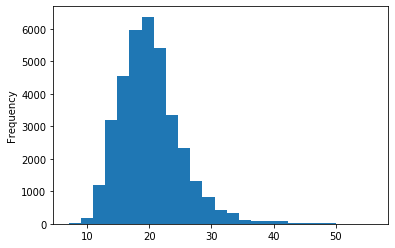

In [37]:
veic['Combined MPG'].plot.hist(bins = 25)

Which one(s) of the variables are nearly normally distributed? How do you know?

In [73]:
#From histogram inspection none of them seems gaussian... But how can I be sure?

# From internet search, I will use the  D’Agostino and Pearson test
from scipy.stats import normaltest

columns = ['Fuel Barrels/Year', 'CO2 Emission Grams/Mile', 'Combined MPG']
alpha = 0.05


for el in columns:
    stat, p = normaltest(veic[el])
    print (p)
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
        
# So none of these three variables seems to be Gaussian.

0.0
Sample does not look Gaussian (reject H0)
0.0
Sample does not look Gaussian (reject H0)
0.0
Sample does not look Gaussian (reject H0)


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

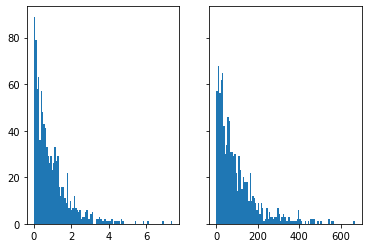

In [78]:
import numpy as np

fig, axs = plt.subplots(1,2,figsize =(6,4), sharey = True)

def exp_nbs(mean, count):
    return np.random.exponential(mean,count)

dist_1 = exp_nbs(1,1000)
dist_2 = exp_nbs(100,1000)

figure =axs[0].hist(dist_1, bins = 100)
figure =axs[1].hist(dist_2, bins = 100)

How are the two distributions different?

In [ ]:
# one decays much faster than the other.+ (See X axis) since we provided a much lower lambda in the second case.


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [84]:
# your answer here
# Hint: This is same as saying P(x<15)

from scipy.stats import expon

time_bank = expon.cdf(15,scale=10)
time_bank

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [85]:
time_bank2 = 1 - time_bank
time_bank2

0.2231301601484298